<a href="https://colab.research.google.com/github/roytirtha/ML-Project--Stock-Price-Prediction/blob/main/ML_Project_StockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [58]:
df=pd.read_csv("/content/gdrive/MyDrive/NSE-Tata-Global-Beverages-Limited.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


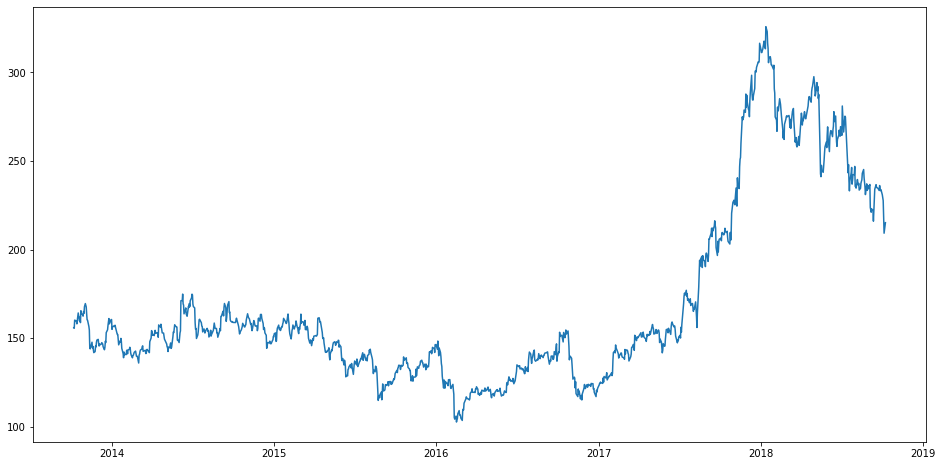

In [60]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [61]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [62]:
new_dataset.head()

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [63]:
scaler=MinMaxScaler(feature_range=(0,1))
# final_dataset=new_dataset.values

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

train_data=new_dataset.values[0:987,:]
valid_data=new_dataset.values[987:,:]

In [64]:
new_dataset.head()

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45


In [66]:
# scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_data=scaler.fit_transform(train_data)
scaled_valid_data=scaler.transform(valid_data)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_train_data[i-60:i,0])
    y_train_data.append(scaled_train_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [67]:
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60,1)),
    LSTM(50),
    Dense(1)
])

model_lstm.compile(loss='mse', optimizer='adam')
hist_lstm = model_lstm.fit(x_train_data, y_train_data, epochs=25, batch_size=16)

Epoch 1/25
58/58 [==============================] - 7s 47ms/step - loss: 0.0160
Epoch 2/25
58/58 [==============================] - 3s 48ms/step - loss: 0.0026
Epoch 3/25
58/58 [==============================] - 3s 47ms/step - loss: 0.0022
Epoch 4/25
58/58 [==============================] - 3s 47ms/step - loss: 0.0027
Epoch 5/25
58/58 [==============================] - 3s 48ms/step - loss: 0.0020
Epoch 6/25
58/58 [==============================] - 3s 47ms/step - loss: 0.0018
Epoch 7/25
58/58 [==============================] - 3s 47ms/step - loss: 0.0017
Epoch 8/25
58/58 [==============================] - 3s 47ms/step - loss: 0.0018
Epoch 9/25
58/58 [==============================] - 3s 48ms/step - loss: 0.0015
Epoch 10/25
58/58 [==============================] - 3s 47ms/step - loss: 0.0015
Epoch 11/25
58/58 [==============================] - 3s 47ms/step - loss: 0.0013
Epoch 12/25
58/58 [==============================] - 3s 47ms/step - loss: 0.0011
Epoch 13/25
58/58 [==================

In [68]:
from tensorflow.keras.layers import Conv1D, Flatten

In [69]:
model_cnn = Sequential([
    Conv1D(10, 5, input_shape=(60,1), activation='relu'),
    Conv1D(20, 5, activation='relu'),
    Conv1D(30, 3, activation='relu'),
    Flatten(),
    Dense(1)
])

model_cnn.compile(loss='mse', optimizer='adam')
hist_cnn = model_cnn.fit(x_train_data, y_train_data, epochs=25, batch_size=16)

Epoch 1/25
58/58 [==============================] - 1s 3ms/step - loss: 0.0220
Epoch 2/25
58/58 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 3/25
58/58 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 4/25
58/58 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 5/25
58/58 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 6/25
58/58 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 7/25
58/58 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 8/25
58/58 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 9/25
58/58 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 10/25
58/58 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 11/25
58/58 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 12/25
58/58 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 13/25
58/58 [==============================

In [70]:
x_valid = []
for i in range(len(valid_data)):
    tmp = scaler.transform(new_dataset.values[987 - 60 + i : 987 + i])
    x_valid.append(tmp)

In [71]:
x_valid = np.array(x_valid, dtype=np.float32)

In [72]:
y_valid = scaled_valid_data

In [73]:
model_lstm.evaluate(x_valid, y_valid)

8/8 [==============================] - 1s 15ms/step - loss: 0.0030


0.003045032499358058

In [74]:
model_cnn.evaluate(x_valid, y_valid)

8/8 [==============================] - 0s 3ms/step - loss: 0.0046


0.004605424124747515

In [75]:
tmp1 = model_lstm.predict(x_valid)
tmp2 = model_cnn.predict(x_valid)
y_predict_lstm = scaler.inverse_transform(tmp1)
y_predict_cnn = scaler.inverse_transform(tmp2)
y_test = scaler.inverse_transform(y_valid)

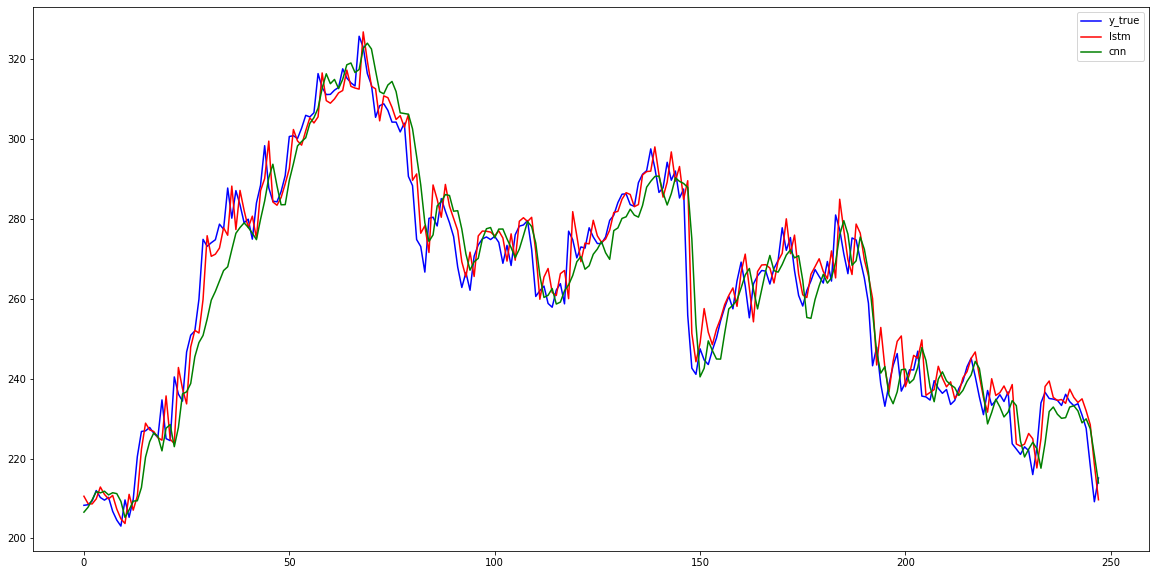

In [76]:
plt.plot(np.arange(248), y_test, c='b', label='y_true')
plt.plot(np.arange(248), y_predict_lstm, c='r', label='lstm')
plt.plot(np.arange(248), y_predict_cnn, c='g', label='cnn')
plt.legend()
plt.show()